In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def count_files_in_folders(directory):
  for root, dirs, files in os.walk(directory):
    print(f"Folder: {root}")
    file_count = len(files)
    print(f"Number of files: {file_count}")
    print("-" * 20)
count_files_in_folders('/content/drive/MyDrive/EyeGazeData/lisat_gaze_data_v1')

Folder: /content/drive/MyDrive/EyeGazeData/lisat_gaze_data_v1
Number of files: 2
--------------------
Folder: /content/drive/MyDrive/EyeGazeData/lisat_gaze_data_v1/train
Number of files: 0
--------------------
Folder: /content/drive/MyDrive/EyeGazeData/lisat_gaze_data_v1/train/Eyes Closed
Number of files: 2675
--------------------
Folder: /content/drive/MyDrive/EyeGazeData/lisat_gaze_data_v1/train/Forward
Number of files: 3028
--------------------
Folder: /content/drive/MyDrive/EyeGazeData/lisat_gaze_data_v1/train/Left Mirror
Number of files: 2683
--------------------
Folder: /content/drive/MyDrive/EyeGazeData/lisat_gaze_data_v1/train/Radio
Number of files: 3108
--------------------
Folder: /content/drive/MyDrive/EyeGazeData/lisat_gaze_data_v1/train/Rearview
Number of files: 2730
--------------------
Folder: /content/drive/MyDrive/EyeGazeData/lisat_gaze_data_v1/train/Right Mirror
Number of files: 2733
--------------------
Folder: /content/drive/MyDrive/EyeGazeData/lisat_gaze_data_v1/tr

In [ ]:
def count_files_in_folders(directory):
  for root, dirs, files in os.walk(directory):
    print(f"Folder: {root}")
    file_count = len(files)
    print(f"Number of files: {file_count}")
    print("-" * 20)
count_files_in_folders('/content/train_n')

Folder: /content/train_n
Number of files: 0
--------------------
Folder: /content/train_n/Left Mirror
Number of files: 1000
--------------------
Folder: /content/train_n/Rearview
Number of files: 1000
--------------------
Folder: /content/train_n/Forward
Number of files: 1000
--------------------
Folder: /content/train_n/Shoulder
Number of files: 1000
--------------------
Folder: /content/train_n/Eyes Closed
Number of files: 1000
--------------------
Folder: /content/train_n/Radio
Number of files: 1000
--------------------
Folder: /content/train_n/Right Mirror
Number of files: 1000
--------------------
Folder: /content/train_n/Speedometer
Number of files: 1000
--------------------


In [ ]:
!cp -r '/content/train_n' '/content/drive/MyDrive/EyeGazeData/train_balanced'

In [ ]:
train = '/content/drive/MyDrive/EyeGazeData/lisat_gaze_data_v1/train'
val ='/content/drive/MyDrive/EyeGazeData/lisat_gaze_data_v1/val'

In [ ]:
import cv2
import os

# List all image files in a directory
image_folder = "/content/drive/MyDrive/EyeGazeData/lisat_gaze_data_v1/train/Eyes Closed"
image_files = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.png'))]

# Check image dimensions
for image_file in image_files:
    image_path = os.path.join(image_folder, image_file)
    img = cv2.imread(image_path)
    height, width, _ = img.shape
    print(f"Image {image_file} - Height: {height}, Width: {width}")

Image 6_01608.png - Height: 224, Width: 224
Image 6_01609.png - Height: 224, Width: 224
Image 6_01610.png - Height: 224, Width: 224
Image 6_01611.png - Height: 224, Width: 224
Image 6_01612.png - Height: 224, Width: 224
Image 6_01613.png - Height: 224, Width: 224
Image 6_01614.png - Height: 224, Width: 224
Image 6_01615.png - Height: 224, Width: 224
Image 6_01616.png - Height: 224, Width: 224
Image 6_01641.png - Height: 224, Width: 224
Image 6_01642.png - Height: 224, Width: 224
Image 6_01643.png - Height: 224, Width: 224
Image 6_01644.png - Height: 224, Width: 224
Image 6_01682.png - Height: 224, Width: 224
Image 6_01683.png - Height: 224, Width: 224
Image 6_01684.png - Height: 224, Width: 224
Image 6_01685.png - Height: 224, Width: 224
Image 6_01686.png - Height: 224, Width: 224
Image 6_01687.png - Height: 224, Width: 224
Image 6_01688.png - Height: 224, Width: 224
Image 6_01689.png - Height: 224, Width: 224
Image 6_01690.png - Height: 224, Width: 224
Image 6_01691.png - Height: 224,

# YOLO V8 Face Detection

In [ ]:
!git clone https://github.com/noorkhokhar99/face-detection-yolov8.git

Cloning into 'face-detection-yolov8'...
remote: Enumerating objects: 54, done.
remote: Counting objects: 100% (54/54), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 54 (delta 15), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (54/54), 16.71 MiB | 19.07 MiB/s, done.
Resolving deltas: 100% (15/15), done.


In [ ]:
!cd face-detection-yolov8

In [ ]:
!pip install ultralytics==8.0.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.8/219.8 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.4/196.4 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 12.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.6 MB/s eta 0:00:00
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144554 sha256=23e20e66438fbba18497f41cde01b4f2a4069a28d245e46f47b823d28a516d10
  Stored in directory: /root/.cache/pip/wheels/12/93/dd/1f6a127edc45659556564c5730f6d4e300888f4bca2d4c5a88
Successfully built antlr4-python3-runtime


In [ ]:
from ultralytics import YOLO
import cv2

In [ ]:
%cd face-detection-yolov8

/content/face-detection-yolov8


In [ ]:
model = YOLO("yolov8n-face.pt")

In [ ]:
import os
import cv2

def detect_objects(image_path, confidence_threshold=0.5, box_size=(224, 224)):
    results = model(image_path)
    boxes = results[0]  # Modify this based on your actual tensor structure
    img = cv2.imread(image_path)

    for box in boxes:
        confidence = box[4]  # Assuming confidence is in the fifth element, modify if needed
        if confidence > confidence_threshold:
            top_left_x = int(box[0])
            top_left_y = int(box[1])
            bottom_right_x = int(box[2])
            bottom_right_y = int(box[3])

            # Calculate the center of the bounding box
            center_x = (top_left_x + bottom_right_x) // 2
            center_y = (top_left_y + bottom_right_y) // 2

            # Calculate the new top-left and bottom-right coordinates for the fixed-size bounding box
            new_top_left_x = max(0, center_x - box_size[0] // 2)
            new_top_left_y = max(0, center_y - box_size[1] // 2)
            new_bottom_right_x = min(img.shape[1], center_x + box_size[0] // 2)
            new_bottom_right_y = min(img.shape[0], center_y + box_size[1] // 2)

            thickness = 1  # value to make the border thicker or thinner
            cv2.rectangle(img, (new_top_left_x, new_top_left_y), (new_bottom_right_x, new_bottom_right_y), (50, 200, 129), thickness)

            # Crop the detected object
            roi = img[new_top_left_y:new_bottom_right_y, new_top_left_x:new_bottom_right_x]

            # Save the cropped image
            output_path = os.path.join(output_directory, f"cropped_with_box_{os.path.basename(image_path)}")
            cv2.imwrite(output_path, roi)

    # Save the image with drawn rectangles (optional)
    output_path = os.path.join(output_directory, f"with_box_{os.path.basename(image_path)}")
    cv2.imwrite(output_path, img)

image_directory = "/content/drive/MyDrive/EyeGazeData/girlTest"
output_directory = "/content/with_box_and_cropping"
os.makedirs(output_directory, exist_ok=True)

for filename in os.listdir(image_directory):
    if filename.endswith(".jpg") or filename.endswith(".png"):  # Add more extensions if needed
        image_path = os.path.join(image_directory, filename)
        detect_objects(image_path)

Ultralytics YOLOv8.0.0 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Fusing layers... 
Model summary: 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/drive/MyDrive/EyeGazeData/girlTest/0.png: 416x640 1 face, 94.1ms
Speed: 0.7ms pre-process, 94.1ms inference, 834.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.0 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Fusing layers... 
Model summary: 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs
image 1/1 /content/drive/MyDrive/EyeGazeData/girlTest/20.png: 416x640 1 face, 10.2ms
Speed: 0.6ms pre-process, 10.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.0 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Fusing layers... 
Model summary: 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs
image 1/1 /content/drive/MyDrive/EyeGazeData/girlTest/10.png: 416x

In [ ]:
import os
import numpy as np
import cv2
from glob import glob

In [ ]:
import os
import cv2

def detect_objects(image_path, confidence_threshold=0.5, box_size=(224, 224)):
    results = model(image_path)
    boxes = results[0]
    img = cv2.imread(image_path)

    for box in boxes:
        confidence = box[4]
        if confidence > confidence_threshold:
            top_left_x = int(box[0])
            top_left_y = int(box[1])
            bottom_right_x = int(box[2])
            bottom_right_y = int(box[3])

            # Calculate the center of the bounding box
            center_x = (top_left_x + bottom_right_x) // 2
            center_y = (top_left_y + bottom_right_y) // 2

            # Calculate the new top-left and bottom-right coordinates for the fixed-size bounding box
            new_top_left_x = max(0, center_x - box_size[0] // 2)
            new_top_left_y = max(0, center_y - box_size[1] // 2)
            new_bottom_right_x = min(img.shape[1], center_x + box_size[0] // 2)
            new_bottom_right_y = min(img.shape[0], center_y + box_size[1] // 2)

            # Draw rectangle on the image with a thicker border
            thickness = 3 # value to make the border thicker or thinner
            cv2.rectangle(img, (new_top_left_x, new_top_left_y), (new_bottom_right_x, new_bottom_right_y), (50, 200, 129), thickness)
             # Crop the detected object
            roi = img[new_top_left_y:new_bottom_right_y, new_top_left_x:new_bottom_right_x]

    output_path = os.path.join(output_directory, f"with_box_{os.path.basename(image_path)}")
    cv2.imwrite(output_path, roi)

image_directory = "/content/drive/MyDrive/EyeGazeData/girlTest"
output_directory = "/content/with_box"
os.makedirs(output_directory, exist_ok=True)

for filename in os.listdir(image_directory):
    if filename.endswith(".jpg") or filename.endswith(".png"):  # Add more extensions if needed
        image_path = os.path.join(image_directory, filename)
        detect_objects(image_path)


Ultralytics YOLOv8.0.0 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Fusing layers... 
Model summary: 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs
image 1/1 /content/drive/MyDrive/EyeGazeData/girlTest/0.png: 416x640 1 face, 6.9ms
Speed: 0.4ms pre-process, 6.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.0 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Fusing layers... 
Model summary: 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs
image 1/1 /content/drive/MyDrive/EyeGazeData/girlTest/20.png: 416x640 1 face, 6.8ms
Speed: 0.4ms pre-process, 6.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.0 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Fusing layers... 
Model summary: 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs
image 1/1 /content/drive/MyDrive/EyeGazeData/girlTest/10.png: 416x640 1 face, 6.8ms
Speed: 0.4ms pre-process, 6.8m

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 15811569372396317719
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14626652160
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 12215407473580218515
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

In [ ]:
BATCH_SIZE = 32
IMG_SIZE= (224,224)
train_dataset = image_dataset_from_directory(train,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE,
                                             label_mode='categorical',
                                             seed=42,validation_split=0.8,
                                             subset="training")
test_dataset, val_dataset=image_dataset_from_directory(val,
                                        shuffle=True,
                                        batch_size=BATCH_SIZE,
                                        image_size=IMG_SIZE,
                                        validation_split=0.5,
                                        subset='both',
                                        label_mode='categorical',
                                        seed=42)

Found 25183 files belonging to 8 classes.
Using 5037 files for training.
Found 4822 files belonging to 8 classes.
Using 2411 files for training.
Using 2411 files for validation.


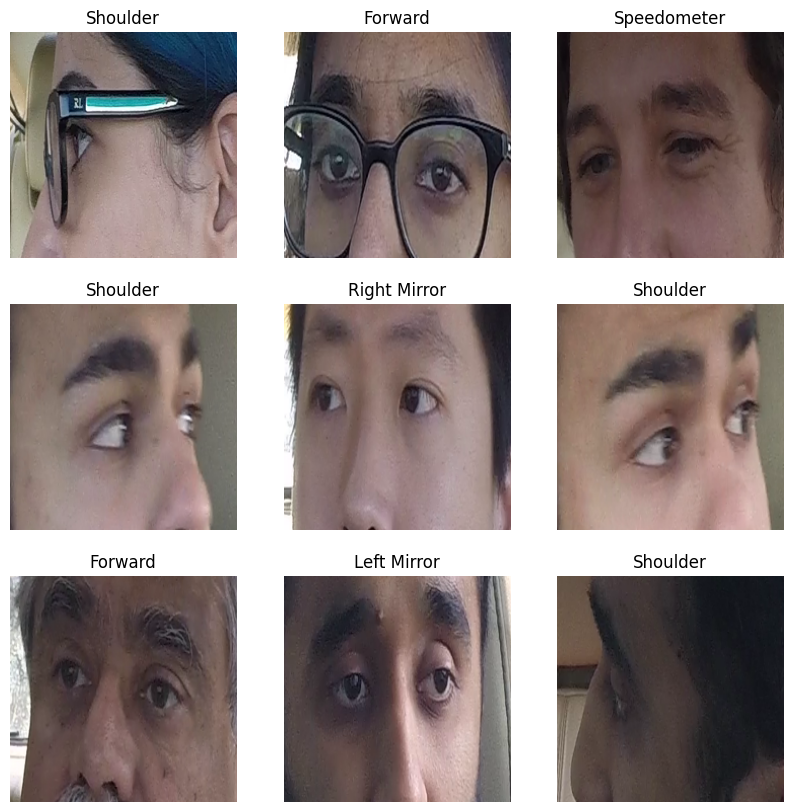

In [ ]:
class_names = train_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

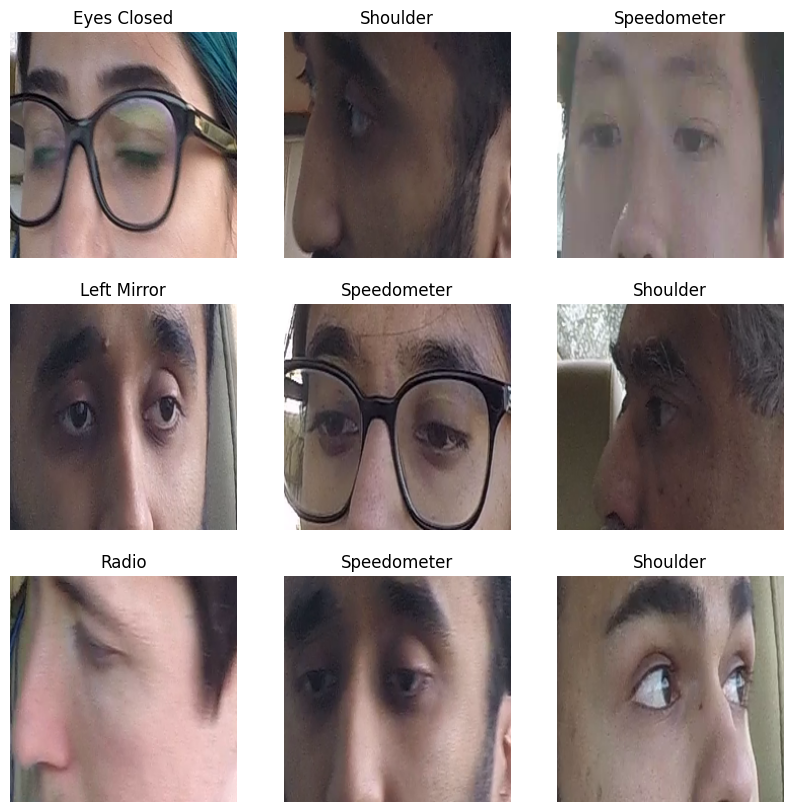

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [ ]:
preprocess_input = tf.keras.applications.resnet50.preprocess_input

In [ ]:
IMG_SHAPE = (224,224,3)
base_model = tf.keras.applications.ResNet50(include_top=True,weights='imagenet',input_shape=IMG_SHAPE)

102967424/102967424 [==============================] - 1s 0us/step


In [ ]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [ ]:
nb_layers = len(base_model.layers)
print(base_model.layers[nb_layers - 2].name)
print(base_model.layers[nb_layers - 1].name)

avg_pool
predictions


In [ ]:
image_batch, label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 1000)


In [ ]:
label_batch

<tf.Tensor: shape=(32,), dtype=int32, numpy=
array([6, 2, 7, 6, 6, 0, 1, 2, 2, 1, 6, 6, 7, 2, 5, 0, 7, 6, 3, 2, 2, 5,
       6, 6, 4, 3, 7, 5, 6, 3, 6, 2], dtype=int32)>

In [ ]:
def eyegaze_model(image_shape=IMG_SIZE):
    input_shape = image_shape + (3,)

    base_model = tf.keras.applications.ResNet50(input_shape=input_shape,
                                                   include_top=False, # set to false dont want early layers
                                                   weights='imagenet')

    # freeze the base model by making it non trainable
    base_model.trainable = False

    # create the input layer (Same as the imageNetv2 input size)
    inputs = tf.keras.Input(shape=input_shape)

    # data preprocessing using the same weights the model was trained on
    x = preprocess_input(inputs)

    # set training to False to avoid keeping track of statistics in the batch norm layer
    x = base_model(x, training=False)

    # use global avg pooling to summarize the info in each channel
    x = tfl.GlobalAveragePooling2D()(x)
    #include dropout with probability of 0.2 to avoid overfitting
    x = tfl.Dropout(0.2)(x)

    # create a prediction layer with 8 neuron (as a classifier only needs eight)
    prediction_layer = tfl.Dense(8, activation='softmax')

    outputs = prediction_layer(x)
    model = tf.keras.Model(inputs, outputs)

    return model

In [ ]:
model1 = eyegaze_model(IMG_SIZE)

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
learning_rate = 3e-4
model1.compile(optimizer=tf.keras.optimizers.Adam(lr=learning_rate),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
# Define a callback to save the model weights after each epoch
checkpoint_filepath = '/content/drive/MyDrive/EyeGazeData/Resnet50Weights/model_weights.h5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',  # You can change this to the metric you want to monitor
    mode='max',
    save_best_only=True)

In [ ]:
from tensorflow.keras.models import load_model

# Load the model
loaded_model = load_model(checkpoint_filepath)


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np
import os
# Directory of images
image_directory = '/content/drive/MyDrive/EyeGazeData/girlYoloOutput/'

In [ ]:

# Define the preprocessing function
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

# Loop over each file in the directory
for filename in os.listdir(image_directory):
    if filename.endswith(".png") or filename.endswith(".jpg"):
        image_path = os.path.join(image_directory, filename)
        # Preprocess the image
        preprocessed_img = preprocess_image(image_path)
        # Make predictions
        predictions = loaded_model.predict(preprocessed_img)
        print(image_path)
        print(predictions)
        print("----------------------------------------")

1/1 [==============================] - 0s 22ms/step
/content/drive/MyDrive/EyeGazeData/girlYoloOutput/cropped_80.png
[[  0.0040197  0.00014289    0.018396  5.6767e-05  1.8527e-05  0.00064259     0.86136     0.11536]]
----------------------------------------
1/1 [==============================] - 0s 21ms/step
/content/drive/MyDrive/EyeGazeData/girlYoloOutput/cropped_0.png
[[  0.0040774  5.5813e-05    0.013612  0.00017577  2.0256e-05  0.00091531     0.77468     0.20646]]
----------------------------------------
1/1 [==============================] - 0s 21ms/step
/content/drive/MyDrive/EyeGazeData/girlYoloOutput/cropped_60.png
[[  0.0027883  0.00023013    0.033884  5.4804e-05  4.6653e-05    0.002054     0.86867    0.092274]]
----------------------------------------
1/1 [==============================] - 0s 22ms/step
/content/drive/MyDrive/EyeGazeData/girlYoloOutput/cropped_40.png
[[  0.0034544  8.7496e-05    0.012143  0.00029685  2.4619e-05   0.0012328     0.52401     0.45875]]
----------

In [ ]:
# Decode image labels
class_names = train_dataset.class_names

print("Class names:", class_names)

Class names: ['Eyes Closed', 'Forward', 'Left Mirror', 'Radio', 'Rearview', 'Right Mirror', 'Shoulder', 'Speedometer']


In [ ]:
initial_epochs = 10
history = model1.fit(train_dataset, epochs=initial_epochs)

Epoch 1/10
 27/158 [====>.........................] - ETA: 10:22 - loss: 1.8895 - accuracy: 0.2951

KeyboardInterrupt: ignored

## Testing

In [ ]:
checkpoint_filepath = '/content/drive/MyDrive/ResNet50_20_epochs/best_model_20_epochs.h5'

In [ ]:
from tensorflow.keras.models import load_model
# Load the model
loaded_model = load_model(checkpoint_filepath)

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np
import os

image_directory = '/content/drive/MyDrive/testingIMG_Output'

# Decode image labels
class_names = ['Eyes Closed', 'Forward', 'Left Mirror', 'Radio', 'Rearview', 'Right Mirror', 'Shoulder', 'Speedometer']

In [ ]:
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array



for filename in os.listdir(image_directory):
    if filename.endswith(".png") or filename.endswith(".jpg"):
        image_path = os.path.join(image_directory, filename)

        preprocessed_img = preprocess_image(image_path)
        predictions = loaded_model.predict(preprocessed_img)

        predicted_class_index = np.argmax(predictions)
        predicted_class_name = class_names[predicted_class_index]

        # Print image path, predictions, and class labels
        print("Image Path:", image_path)
        print("Probabilities:", predictions)
        print("Predicted Class:", predicted_class_name)
        print("----------------------------------------")

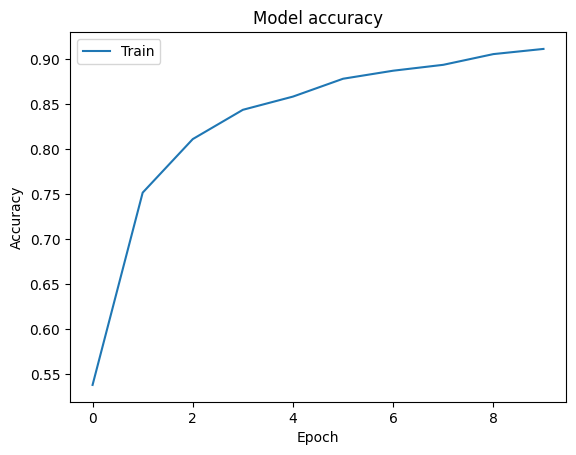

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train'], loc='upper left') #, 'Validation'
plt.show()

In [ ]:
# Save the entire model after training
model1.save(checkpoint_filepath)

In [ ]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model1.evaluate(test_dataset,verbose=2)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')